In [2]:
import pandas as pd
import re

df = pd.read_csv("corpus_isi_talenta_FIX.csv")

def clean_text(text):
    text = re.sub(r'<.*?>', '', text) # hapus HTML tags
    text = re.sub(r'http\S+', '', text) # hapus URLs
    text = re.sub(r'\s+', ' ', text) # hapus spasi berlebih
    text = text.lower() # lowercase
    # hapus kata promosi umum
    promo_patterns = [
        r'coba gratis talenta', r'jadwalkan demo', r'hubungi sales', r'hubungi kami', r'\bklik\b', r'\bbaca juga\b'
    ]
    for pat in promo_patterns:
        text = re.sub(pat, '', text)
    return text.strip()

df['body_clean'] = df['body'].apply(clean_text)
df.to_csv("corpus_dokumen_final_clean.csv", index=False)


In [ ]:
import pandas as pd

df = pd.read_csv("corpus_dokumen_final_clean.csv") 

# Lihat 10 baris pertama body_clean
print(df['body_clean'].head(10))


0    banyak orang berpendapat bahwa software cloud ...
1    saat anda telah memutuskan akan pindah kerja a...
2    pengelolaan sumber daya manusia (sdm) di rumah...
3    guna meningkatkan produktivitas dan kinerja, p...
4    salah satu tantangan sistem gaji atau payroll ...
5    apa itu kuesioner kinerja karyawan? selengkapn...
6    anda merasa mengelola karyawan remote terasa r...
7    apakah pinjaman karyawan wajib diberikan? baga...
8    ketika hendak melamar pekerjaan yang baru, ter...
9    slip gaji adalah salah satu komponen penting y...
Name: body_clean, dtype: object


In [2]:
# Gabungkan semua isi korpus
all_text = ' '.join(df['body_clean'].dropna())

# Tokenisasi (split ke kata-kata)
all_words = all_text.split()

# Lihat 50 kata unik pertama (kasus kecil)
unique_words = list(set(all_words))
print(unique_words[:50])


['bandingkan', 'salary.', 'run', 'pencemaran', 'pembunuh', 'catatan.', 'lain-lain)', 'bertujuan,', 'apps', 'terdesentralisasi', 'vacation', 'memang,', 'digunakan', 'standard-standar', 'nboarding', '25/1992,', 'digunakan:', 'meminang', 'cuma', 'siapkan,', 'retire', 'bum', 'mengeksekusi', 'kantoran.', 'menharuskan', 'dampak-dampak', 'traumatis', 'ditindaklanjuti', 'tercatat,', 'maksimal.', 'simultan.', 'pencernaan,', 'limitasi.', '(eat).', 'emosi,', 'skilled-talent', 'manusia', 'kepuasan', 'tradisional/', '(to-do', 'keharmonisan', 'memfitnah,', 'regulasi', 'kompromi.', 'informasikan', 'atasan-bawahan', 'peta', 'kami,', 'ketidakpastian.', 'kantin']


In [3]:
from collections import Counter

word_freq = Counter(all_words)
# Top 20 kata paling banyak muncul
print(word_freq.most_common(20))


[('yang', 32820), ('dan', 23317), ('karyawan', 14203), ('untuk', 14119), ('dengan', 13850), ('dalam', 10196), ('perusahaan', 9781), ('di', 8340), ('dapat', 8139), ('ini', 7970), ('atau', 7405), ('anda', 6692), ('dari', 6121), ('kerja', 5975), ('adalah', 5767), ('bisa', 5493), ('lebih', 5382), ('tidak', 5347), ('juga', 5276), ('akan', 4967)]


In [4]:
!pip install wordcloud matplotlib


Defaulting to user installation because normal site-packages is not writeable


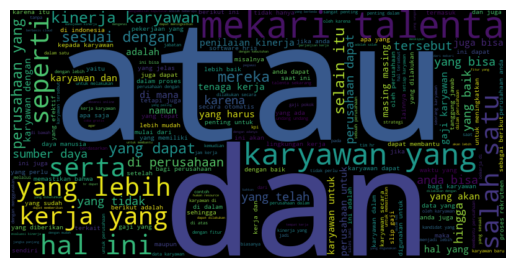

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [6]:
import pandas as pd
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
def remove_stopwords(text):
    words = text.split()
    filtered = [w for w in words if w not in stopwords]
    return ' '.join(filtered)

df = pd.read_csv("corpus_dokumen_final_clean.csv")
df['body_nostop'] = df['body_clean'].apply(remove_stopwords)
df.to_csv("corpus_dokumen_final_nostop.csv", index=False)


In [8]:
import os

print("Jumlah core CPU (os):", os.cpu_count())


Jumlah core CPU (os): 16


In [1]:
import pandas as pd

df = pd.read_csv("corpus_dokumen_final_nostop.csv")
print(df['body_nostop'].head(10))  # Lihat 10 dokumen pertama setelah stopword removal


0    banyak orang berpendapat software cloud tidakl...
1    memutuskan pindah kerja berhenti kerja alasan ...
2    pengelolaan sumber daya manusia (sdm) rumah sa...
3    meningkatkan produktivitas kinerja, perusahaan...
4    salah satu tantangan sistem gaji payroll perus...
5    apa kuesioner kinerja karyawan? selengkapnya a...
6    merasa mengelola karyawan remote terasa rumit?...
7    pinjaman karyawan wajib diberikan? bagaimana k...
8    hendak melamar pekerjaan baru, terkadang seseo...
9    slip gaji salah satu komponen penting luput pe...
Name: body_nostop, dtype: object


In [3]:
df = pd.read_csv("corpus_dokumen_final_stemmed.csv")
print(df['body_stemmed'].head(10))  # Lihat 10 dokumen pertama setelah stemming


0    banyak orang dapat software cloud tidak aman n...
1    putus pindah kerja henti kerja alas tentu pent...
2    kelola sumber daya manusia sdm rumah sakit jau...
3    tingkat produktivitas kerja usaha laku apa sal...
4    salah satu tantang sistem gaji payroll usaha m...
5    apa kuesioner kerja karyawan lengkap artikel m...
6    rasa kelola karyawan remote asa rumit temu car...
7    pinjam karyawan wajib beri bagaimana konsekuen...
8    hendak lamar kerja baru terkadang orang kerap ...
9    slip gaji salah satu komponen penting luput us...
Name: body_stemmed, dtype: object


In [4]:
all_text = ' '.join(df['body_stemmed'].dropna())
all_words = all_text.split()
unique_words = list(set(all_words))
print(unique_words[:50])  # tampilkan 50 kata unik random hasil stemming


['pencapain', 'kapasitas', 'asik', 'anggota', 'tetapi', 'anjani', 'kris', 'utility', 'giv', 'tukang', 'taleta', 'tahun', 'package', 'executive', 'misklasifikasi', 'unruk', 'malu', '10-15', 'bet', 'founder', 'tampak', 'halaman', 'rentet', 'pindai', 'dominance', 'hopping', 'gera', 'provinsi', 'detail', 'bot', '19', 'choice', 'stop', 'outsail', 'hessing', 'hutchison', 'eichinger', 'andal', 'configuring', 'kesalahaan', 'konvensi', 'rups', 'adlaah', 'yakin', 'adobe', 'konektivitas', 'raba', 'ira', 'in-store', 'audiovisual']


In [5]:
from collections import Counter

word_freq = Counter(all_words)
print(word_freq.most_common(20))  # 20 kata stemmed paling sering muncul


[('kerja', 18208), ('karyawan', 18097), ('usaha', 14322), ('lebih', 6048), ('gaji', 5031), ('laku', 4929), ('jadi', 4536), ('beri', 4437), ('guna', 4339), ('milik', 4236), ('talenta', 4234), ('hr', 4185), ('baik', 4083), ('proses', 3501), ('mekar', 3391), ('sebut', 3247), ('tingkat', 3098), ('perlu', 2885), ('satu', 2874), ('nilai', 2872)]


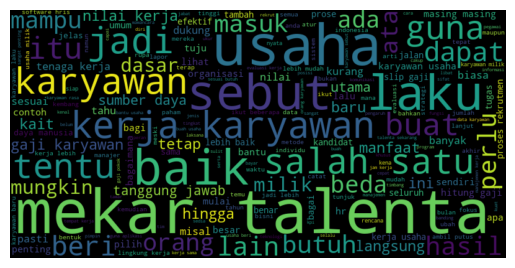

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [2]:
import pandas as pd

df_talenta = pd.read_csv("corpus_isi_talenta_stemmed.csv")
df_kompasiana = pd.read_csv("corpus_isi_kompasiana_stemmed.csv")

df_talenta["sumber"] = "talenta"
df_kompasiana["sumber"] = "kompasiana"

df_all = pd.concat([df_talenta, df_kompasiana], ignore_index=True)
df_all.to_csv("corpus_final_stemmed.csv", index=False)


In [3]:
# Implementasi TF-IDF dan Mekanisme Pencarian (Perangkingan Cosine Similarity)
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
# Catatan: Perhitungan Cosine Similarity di VSM dioptimalkan melalui perkalian matriks X * q_vec.T

# 1. Pembentukan Matriks Bobot (TF-IDF Matrix)
# X adalah matriks dokumen x kata, tfidf adalah vectorizer yang telah di-fit
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df_all['body_stemmed']) 


# 2. Fungsi Perangkingan (Cosine Similarity)
def simple_search(query, tfidf, X, df, n=10):
    # Mengubah kueri menjadi vektor bobot (q_vec)
    q_vec = tfidf.transform([query]) 
    
    # Menghitung skor relevansi (ekivalen Cosine Similarity melalui dot product)
    scores = (X * q_vec.T).toarray() 
    
    # Mengambil indeks dokumen dengan skor tertinggi
    top_idx = scores.flatten().argsort()[::-1][:n] 
    
    # Mengembalikan hasil peringkat
    return df.iloc[top_idx][['title', 'body_stemmed', 'sumber', 'url']]

# Contoh penggunaan
results = simple_search('karyawan produktivitas', tfidf, X, df_all)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Buat TF-IDF matrix untuk seluruh dokumen
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df_all['body_stemmed'])
fitur_kata = tfidf.get_feature_names_out()
print(fitur_kata[:50])    # Tampilkan 50 kata pertama (fitur)

['00' '000' '0000' '003910' '01' '010' '0110' '02' '021' '022' '024' '027'
 '0274' '03' '031' '035' '0361' '039' '04' '040' '0411' '042' '043' '045'
 '05' '056' '06' '061' '062' '067' '069' '07' '070' '071' '073' '075'
 '080' '08118750400' '088' '09' '099' '10' '100' '1000' '101' '102' '103'
 '104' '105' '1064']


In [12]:
import numpy as np

tfidf_doc0 = X[0].toarray().flatten()
nonzero_idx = np.where(tfidf_doc0 > 0)[0]
for idx in nonzero_idx:
    print(f"'{fitur_kata[idx]}' : {tfidf_doc0[idx]}")


'000' : 0.02477159375467163
'10' : 0.021269971978478314
'100' : 0.028572274931706203
'168' : 0.043028342420034074
'2016' : 0.033535552568332086
'25' : 0.028572274931706203
'27001' : 0.037618998607397064
'33' : 0.043028342420034074
'4100' : 0.053847030045308115
'60' : 0.03271331557530342
'70' : 0.033830079351945326
'83' : 0.044070425880436755
'95' : 0.04210915966486977
'absensi' : 0.012736488535842562
'ajar' : 0.017164323837687557
'akibat' : 0.018905743585880534
'akses' : 0.013906034916472212
'alas' : 0.06865729535075023
'aman' : 0.37811487171761066
'ancam' : 0.10336420597048918
'android' : 0.03413615911101111
'anggap' : 0.07474851565168163
'apa' : 0.00998523344541919
'aplikasi' : 0.019998768017333933
'app' : 0.03669981585223275
'aset' : 0.05154696935811771
'atas' : 0.009845121360669342
'attack' : 0.15204830028422234
'attendance' : 0.02431508739851755
'autentikasi' : 0.044070425880436755
'automasi' : 0.03986407913613342
'azure' : 0.09687537246534218
'bagaimana' : 0.03288886013447367
'ba

In [13]:
import pandas as pd

# Matriks dokumen (baris) x kata (kolom)
tfidf_df = pd.DataFrame(X[:3].toarray(), columns=fitur_kata)
print(tfidf_df)


    00       000  0000  003910   01  010  0110   02  021  022  ...  zenger  \
0  0.0  0.024772   0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...     0.0   
1  0.0  0.000000   0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...     0.0   
2  0.0  0.000000   0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...     0.0   

   zety  zillow  zimbelman  zktime  zodiak      zoho  zona  zoom  zumba  
0   0.0     0.0        0.0     0.0     0.0  0.000000   0.0   0.0    0.0  
1   0.0     0.0        0.0     0.0     0.0  0.000000   0.0   0.0    0.0  
2   0.0     0.0        0.0     0.0     0.0  0.054713   0.0   0.0    0.0  

[3 rows x 10200 columns]


In [14]:
top_indices = tfidf_doc0.argsort()[-10:][::-1]  # 10 kata tertinggi
for i in top_indices:
    print(f"'{fitur_kata[i]}' : {tfidf_doc0[i]}")


'cloud' : 0.43335780442169175
'aman' : 0.37811487171761066
'layan' : 0.21167589344151078
'data' : 0.1950959935060364
'attack' : 0.15204830028422234
'premise' : 0.14351031543681633
'bobol' : 0.14008879945343436
'software' : 0.1388362481613374
'serang' : 0.1263274789946093
'on' : 0.10974054030771


In [15]:
def simple_search(query, tfidf, X, df, n=10):
    q_vec = tfidf.transform([query])
    scores = (X * q_vec.T).toarray()
    top_idx = scores.flatten().argsort()[::-1][:n]
    return df.iloc[top_idx][['title', 'body_stemmed', 'sumber', 'url']]

# Contoh pencarian
results = simple_search('karyawan produktivitas', tfidf, X, df_all)
print(results)


                                                 title  \
138  Produktivitas Karyawan, Begini Cara Tim HR Men...   
143  Solusi Praktis Pengukuran Produktivitas Kerja ...   
699  Cara Meningkatkan Produktivitas Karyawan denga...   
136  Cara Efektif untuk Meningkatkan Produktivitas ...   
99   Indikator Penilaian Kinerja Karyawan: Pengerti...   
277  Metode Penilaian Kerja untuk Ukur Produktivita...   
604        14 Kriteria untuk Evaluasi Kinerja Karyawan   
101               Pengertian Tingkat Turnover Karyawan   
703  Pentingnya Melakukan Masa Orientasi Karyawan Baru   
243  Kinerja Karyawan: Definisi, Jenis, Faktor, Ind...   

                                          body_stemmed   sumber  \
138  tips mudah tingkat produktivitas karyawan apa ...  talenta   
143  produktivitas kerja salah satu indikator penti...  talenta   
699  upaya tingkat cara tingkat produktivitas kerja...  talenta   
136  orang kerja divisi human resources hr tingkat ...  talenta   
99   usaha kerja karyawan 

In [16]:
def simple_search(query, tfidf_vec, tfidf_matrix, doc_df, n=10):
    q_vec = tfidf_vec.transform([query])
    scores = (tfidf_matrix * q_vec.T).toarray()
    top_idx = scores.flatten().argsort()[::-1][:n]
    return doc_df.iloc[top_idx][["title", "body_stemmed", "sumber", "url"]]

# Contoh pencarian
results = simple_search('absensi karyawan', tfidf, X, df_all)
print(results)


                                                 title  \
602  4 Alasan Absensi Digital jadi Pilihan Terbaik ...   
681  11 Fitur Aplikasi Absensi Online yang Harus Di...   
424  Aplikasi Fingerprint Vs Absensi Online, Kelebi...   
383  9 Cara Mengatasi Masalah Absensi Karyawan deng...   
115  Manajemen Absensi Karyawan: Pengertian, Jenis,...   
549  Cara Absensi dengan Aplikasi Selfie Wajah, RFI...   
708  Pilih Absensi Elektronik vs Absensi Online, Ma...   
153  Bagaimana Aplikasi HRD Bisa Membantu Bisnis Da...   
65   7 Aplikasi Absensi Online GPS Terbaik untuk Pe...   
609    Masa Kini, Absensi Berbasis Web Menjadi Andalan   

                                          body_stemmed   sumber  \
602  absen manual hingga absensi digital online fit...  talenta   
681  era teknologi ini banyak usaha mulai alih sist...  talenta   
424  aplikasi fingerprint alat absen sidik jari laz...  talenta   
383  begini cara atas masalah absensi pegawai karya...  talenta   
115  manajemen absensi buk

In [17]:
!pip install rank_bm25


Defaulting to user installation because normal site-packages is not writeable


In [5]:
# Implementasi BM25 dengan Parameter Tuning
from rank_bm25 import BM25Okapi

# Tokenisasi korpus
tokenized_corpus = [doc.split() for doc in df_all['body_stemmed']]

# Inisialisasi Model dengan parameter tuning (nilai default k1=1.2, b=0.75)
bm25 = BM25Okapi(
    tokenized_corpus, 
    k1=1.2,  # Parameter saturasi
    b=0.75   # Parameter normalisasi panjang dokumen
)

# Fungsi Perangkingan BM25
def bm25_search(query, bm25, df, n=10):
    query_tokens = query.lower().split()
    scores = bm25.get_scores(query_tokens)
    top_idx = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:n]
    return df.iloc[top_idx][['title', 'body_stemmed', 'sumber', 'url']]

In [ ]:
from rank_bm25 import BM25Okapi

# Tokenisasi korpus
tokenized_corpus = [doc.split() for doc in df_all['body_stemmed']]
bm25 = BM25Okapi(tokenized_corpus)

def bm25_search(query, bm25, df, n=10):
    query_tokens = query.lower().split()
    scores = bm25.get_scores(query_tokens)
    top_idx = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:n]
    return df.iloc[top_idx][['title', 'body_stemmed', 'sumber', 'url']]

# Contoh pencarian BM25
bm25_results = bm25_search("absensi karyawan", bm25, df_all)
print(bm25_results)


                                                 title  \
602  4 Alasan Absensi Digital jadi Pilihan Terbaik ...   
424  Aplikasi Fingerprint Vs Absensi Online, Kelebi...   
65   7 Aplikasi Absensi Online GPS Terbaik untuk Pe...   
681  11 Fitur Aplikasi Absensi Online yang Harus Di...   
708  Pilih Absensi Elektronik vs Absensi Online, Ma...   
420  Absensi Mudah dengan Fitur ESS dari Aplikasi M...   
383  9 Cara Mengatasi Masalah Absensi Karyawan deng...   
549  Cara Absensi dengan Aplikasi Selfie Wajah, RFI...   
153  Bagaimana Aplikasi HRD Bisa Membantu Bisnis Da...   
22   Cara Membuat Contoh Daftar Hadir Karyawan di E...   

                                          body_stemmed   sumber  \
602  absen manual hingga absensi digital online fit...  talenta   
424  aplikasi fingerprint alat absen sidik jari laz...  talenta   
65   guna metode absensi online bas aplikasi web an...  talenta   
681  era teknologi ini banyak usaha mulai alih sist...  talenta   
708  absensi presensi sala

In [19]:
query_list = ['absensi karyawan', 'gaji', 'cuti', 'manajemen waktu']  # dst.
for query in query_list:
    tfidf_res = simple_search(query, tfidf, X, df_all)
    tfidf_res.to_csv(f'results_tfidf_{query.replace(" ","_")}.csv', index=False)
    bm25_res = bm25_search(query, bm25, df_all)
    bm25_res.to_csv(f'results_bm25_{query.replace(" ","_")}.csv', index=False)


In [1]:
import pandas as pd

files = [
    ("TF-IDF Absensi", "results_tfidf_absensi_karyawan.csv"),
    ("TF-IDF Cuti", "results_tfidf_cuti.csv"),
    ("TF-IDF Gaji", "results_tfidf_gaji.csv"),
    ("TF-IDF ManajemenWaktu", "results_tfidf_manajemen_waktu.csv"),
    ("BM25 Absensi", "results_bm25_absensi_karyawan.csv"),
    ("BM25 Cuti", "results_bm25_cuti.csv"),
    ("BM25 Gaji", "results_bm25_gaji.csv"),
    ("BM25 ManajemenWaktu", "results_bm25_manajemen_waktu.csv"),
]
results = []

for label, fname in files:
    try:
        df_eval = pd.read_csv(fname, on_bad_lines='skip')
        if 'relevan' in df_eval.columns:
            tp = df_eval['relevan'].sum()
            retrieved = len(df_eval)
            precision = tp / retrieved if retrieved else 0
            recall = tp / retrieved if retrieved else 0  # Ganti denominator jika tahu total relevan sebenarnya
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) else 0
            results.append({'File': label, 'Precision': precision, 'Recall': recall, 'F1-Score': f1})
        else:
            results.append({'File': label, 'Precision': '-', 'Recall': '-', 'F1-Score': '-', 'Note': 'Kolom relevan tidak ditemukan'})
    except Exception as e:
        results.append({'File': label, 'Precision': '-', 'Recall': '-', 'F1-Score': '-', 'Note': str(e)})

# Buat DataFrame rekap
df_results = pd.DataFrame(results)
print(df_results)


                    File  Precision    Recall  F1-Score
0         TF-IDF Absensi   1.000000  1.000000  1.000000
1            TF-IDF Cuti   0.800000  0.800000  0.800000
2            TF-IDF Gaji   1.000000  1.000000  1.000000
3  TF-IDF ManajemenWaktu   0.900000  0.900000  0.900000
4           BM25 Absensi   0.857143  0.857143  0.857143
5              BM25 Cuti   1.000000  1.000000  1.000000
6              BM25 Gaji   1.000000  1.000000  1.000000
7    BM25 ManajemenWaktu   1.000000  1.000000  1.000000


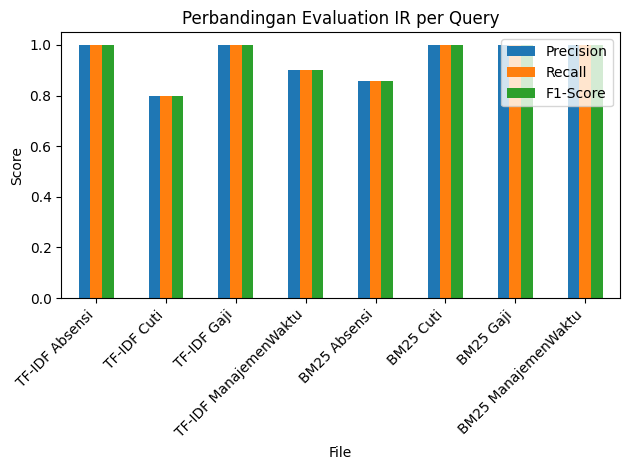

In [2]:
import matplotlib.pyplot as plt

df_results.plot(x="File", y=["Precision", "Recall", "F1-Score"], kind="bar")
plt.title("Perbandingan Evaluation IR per Query")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [34]:
# Statistik dokumen
print("Jumlah dokumen:", len(df_all))
print("Sumber data:", df_all['sumber'].value_counts())
print("Jumlah term unik (TF-IDF vocab):", len(tfidf.get_feature_names_out()))


Jumlah dokumen: 729
Sumber data: sumber
talenta       709
kompasiana     20
Name: count, dtype: int64
Jumlah term unik (TF-IDF vocab): 10200


In [35]:
query = "absensi karyawan"
tfidf_res = simple_search(query, tfidf, X, df_all)
bm25_res = bm25_search(query, bm25, df_all)

print("TF-IDF Hasil Search:")
print(tfidf_res[['title','url']].head(5))
print("BM25 Hasil Search:")
print(bm25_res[['title','url']].head(5))



TF-IDF Hasil Search:
                                                 title  \
602  4 Alasan Absensi Digital jadi Pilihan Terbaik ...   
681  11 Fitur Aplikasi Absensi Online yang Harus Di...   
424  Aplikasi Fingerprint Vs Absensi Online, Kelebi...   
383  9 Cara Mengatasi Masalah Absensi Karyawan deng...   
115  Manajemen Absensi Karyawan: Pengertian, Jenis,...   

                                                   url  
602  https://www.talenta.co/blog/absensi-manual-abs...  
681  https://www.talenta.co/blog/fitur-aplikasi-abs...  
424  https://www.talenta.co/blog/aplikasi-fingerpri...  
383  https://www.talenta.co/blog/permasalahan-absen...  
115  https://www.talenta.co/blog/manajemen-absensi-...  
BM25 Hasil Search:
                                                 title  \
602  4 Alasan Absensi Digital jadi Pilihan Terbaik ...   
424  Aplikasi Fingerprint Vs Absensi Online, Kelebi...   
65   7 Aplikasi Absensi Online GPS Terbaik untuk Pe...   
681  11 Fitur Aplikasi Absensi Online

In [3]:
# Asumsikan df_results sudah berisi hasil evaluasi IR batch
print(df_results.to_markdown(index=False))


| File                  |   Precision |   Recall |   F1-Score |
|:----------------------|------------:|---------:|-----------:|
| TF-IDF Absensi        |    1        | 1        |   1        |
| TF-IDF Cuti           |    0.8      | 0.8      |   0.8      |
| TF-IDF Gaji           |    1        | 1        |   1        |
| TF-IDF ManajemenWaktu |    0.9      | 0.9      |   0.9      |
| BM25 Absensi          |    0.857143 | 0.857143 |   0.857143 |
| BM25 Cuti             |    1        | 1        |   1        |
| BM25 Gaji             |    1        | 1        |   1        |
| BM25 ManajemenWaktu   |    1        | 1        |   1        |


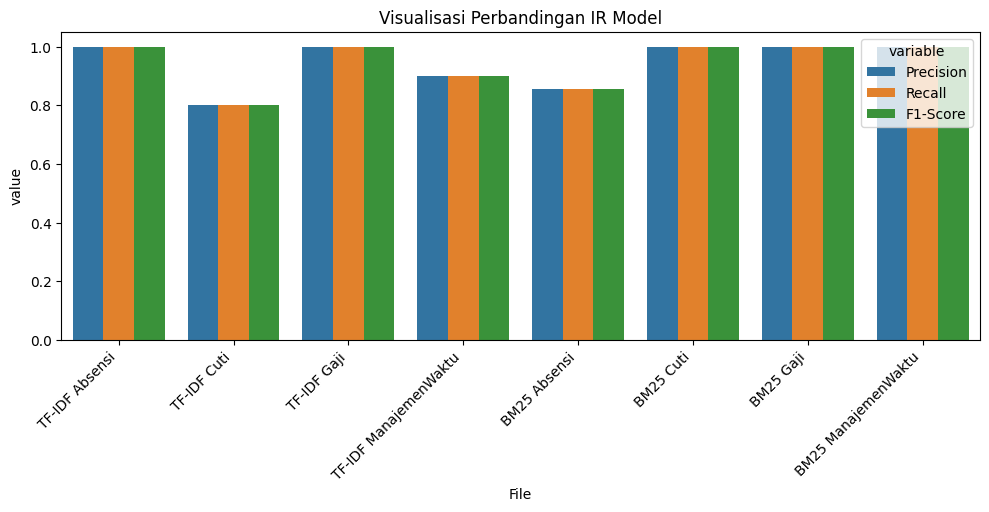

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

melted = df_results.melt(['File'])
plt.figure(figsize=(10,5))
sns.barplot(data=melted, x='File', y='value', hue='variable')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title("Visualisasi Perbandingan IR Model")
plt.show()


In [5]:
query = "gaji karyawan"
tfidf_res = simple_search(query, tfidf, X, df_all)
tfidf_res.to_csv("hasil_search_tfidf_gaji.csv", index=False)


NameError: name 'simple_search' is not defined